# EDA ANALYSIS ON CRICKET DATASET

The following dataset contains three datasets of worldcup matches which showcases the performance made by diffrent players on 
diffrent years and the datsets are batsman dataset contain runs,strike rate,balls faced,notouts,date of match,fours,sixers and the bowler data contain overs,maidens,runs conceeded,strike rate,economy,average,wickets,ground,opposition,and the match results contain wins,loss,margin,country,opposition,ground.Her we going to make analysis on that.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [2]:
#uploading the dataset

bat=pd.read_csv('bat.csv')
ball=pd.read_csv('bowl.csv')
odi=pd.read_csv('odi.csv')

In [3]:
#checking the null values

ball.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [4]:
bat.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [5]:
odi.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

# Data cleaning

In [6]:
#Dropping the unnecessary columns

bat.drop(['Unnamed: 0','Match_ID','Player_ID'],inplace=True,axis=1)
ball.drop(['Unnamed: 0','Match_ID','Player_ID'],inplace=True,axis=1)
odi.drop(['Unnamed: 0','Match_ID','Country_ID'],inplace=True,axis=1)

In [7]:
#Replacing values

bat=bat.replace(['-'],0)
ball=ball.replace(['-'],0)
odi=odi.replace(['-'],0)

In [8]:
#seperating column for notouts

bat['Bat1']=bat['Bat1'].apply(str)
bat['notout']=np.where(bat['Bat1'].str.endswith('*'),1,0)

In [9]:
#changing the datatype of bat dataset

bat_new=bat.loc[((bat['Bat1']!='DNB')&(bat['Bat1']!='TDNB')&(bat['Bat1']!='absent')&(bat['Bat1']!='sub')),'Runs':]
bat_new['Runs']=bat_new['Runs'].astype(int)
bat_new['BF']=bat_new['BF'].astype(int)
bat_new['SR']=bat_new['SR'].astype(float)
bat_new['4s']=bat_new['4s'].astype(int)
bat_new['6s']=bat_new['6s'].astype(int)

In [10]:
bat_new.dtypes

Runs            int32
BF              int32
SR            float64
4s              int32
6s              int32
Opposition     object
Ground         object
Start Date     object
Batsman        object
notout          int32
dtype: object

In [11]:
odi.dtypes

Result         object
Margin         object
BR            float64
Toss           object
Bat            object
Opposition     object
Ground         object
Start Date     object
Country        object
dtype: object

In [12]:
#changing the datatype of dataset


ball['Overs']=ball['Overs'].astype(float)
ball['Mdns']=ball['Overs'].astype(int)
ball['Runs']=ball['Overs'].astype(int)
ball['Wkts']=ball['Overs'].astype(int)
ball['Econ']=ball['Overs'].astype(float)
ball['Ave']=ball['Overs'].astype(float)
ball['SR']=ball['SR'].astype(float)
ball['Ave']=ball['Overs'].astype(float)
#ball['Start Date']=pd.to_datetime(ball['Start Date'],format='%d-%m-%y')

In [13]:
bat_new.dtypes

Runs            int32
BF              int32
SR            float64
4s              int32
6s              int32
Opposition     object
Ground         object
Start Date     object
Batsman        object
notout          int32
dtype: object

In [14]:
ball.dtypes

Overs         float64
Mdns            int32
Runs            int32
Wkts            int32
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Bowler         object
dtype: object

# Batsman Analysis

In [15]:
#total matches played by each country

print("Matches played so far :",odi.shape[0])

print("\nTeams Participated :",odi["Country"].unique())

Matches played so far : 1322

Teams Participated : ['Pakistan' 'India' 'SriLanka' 'Australia' 'England' 'SouthAfrica'
 'Newzealad' 'WestIndies' 'Afghanistan' 'Bangladesh']


Text(0.5, 1.0, 'Highest Runs Scored')

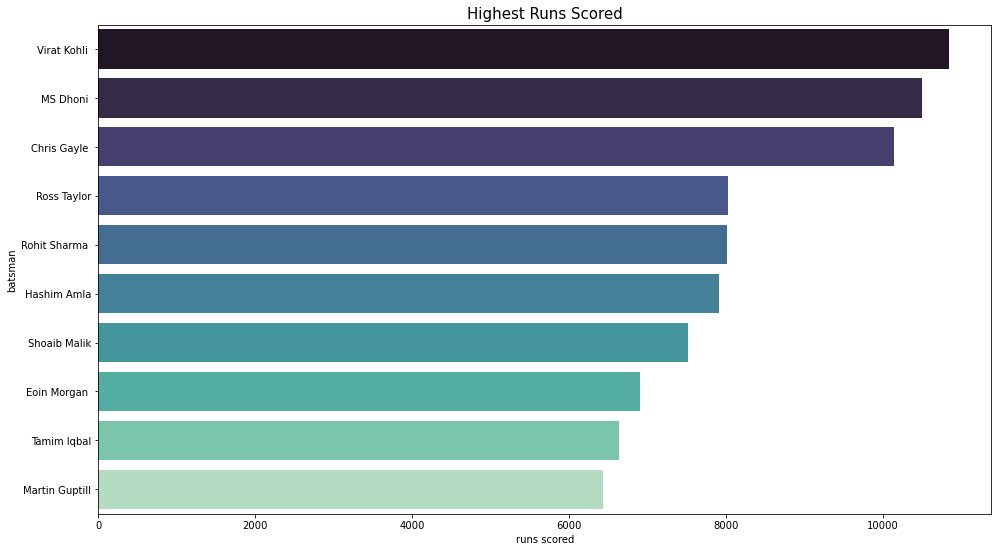

In [16]:
#Highest run score by batsman

r=bat_new.groupby(['Batsman'])['Runs'].sum().reset_index()
r.sort_values(by='Runs',ascending=False,inplace=True)
r=r.head(10)

plt.figure(figsize=(16,9))
sns.barplot(y='Batsman',x='Runs',data=r,palette="mako")

plt.yticks(fontsize=10)
plt.ylabel("batsman",fontsize=10)
plt.xlabel("runs scored",fontsize=10)
plt.title("Highest Runs Scored",fontsize=15)

Text(0.5, 1.0, 'Highest Strike Rate')

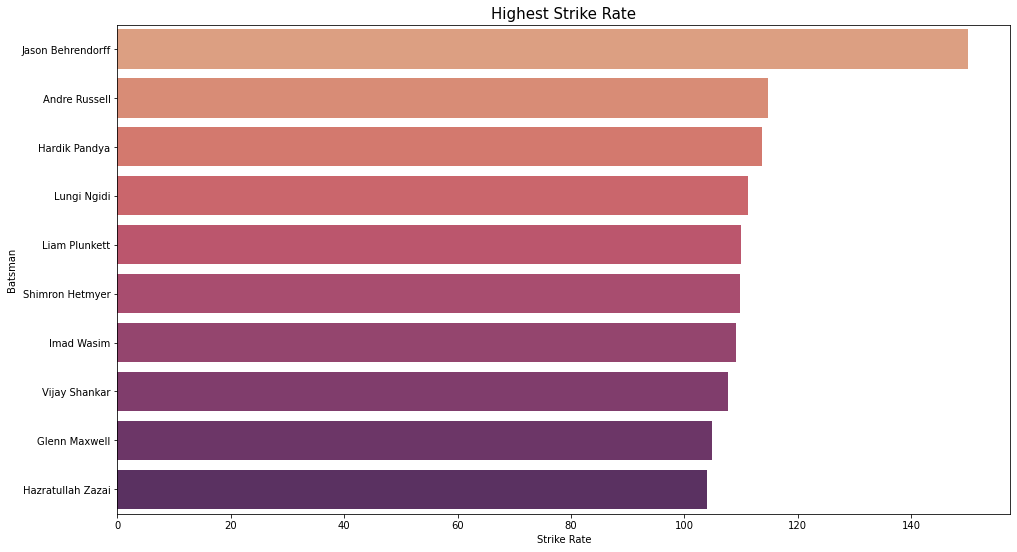

In [17]:
#Maximum strike rate by batsman


sr=bat_new.groupby(['Batsman'])['SR'].mean().reset_index()
sr.sort_values(by='SR',ascending=False,inplace=True)
sr=sr.head(10)

plt.figure(figsize=(16,9))
sns.barplot(y='Batsman',x='SR',data=sr,palette="flare")

plt.yticks(fontsize=10)
plt.ylabel("Batsman",fontsize=10)
plt.xlabel("Strike Rate",fontsize=10)
plt.title("Highest Strike Rate",fontsize=15)

Text(0.5, 1.0, 'Highest number of Fours')

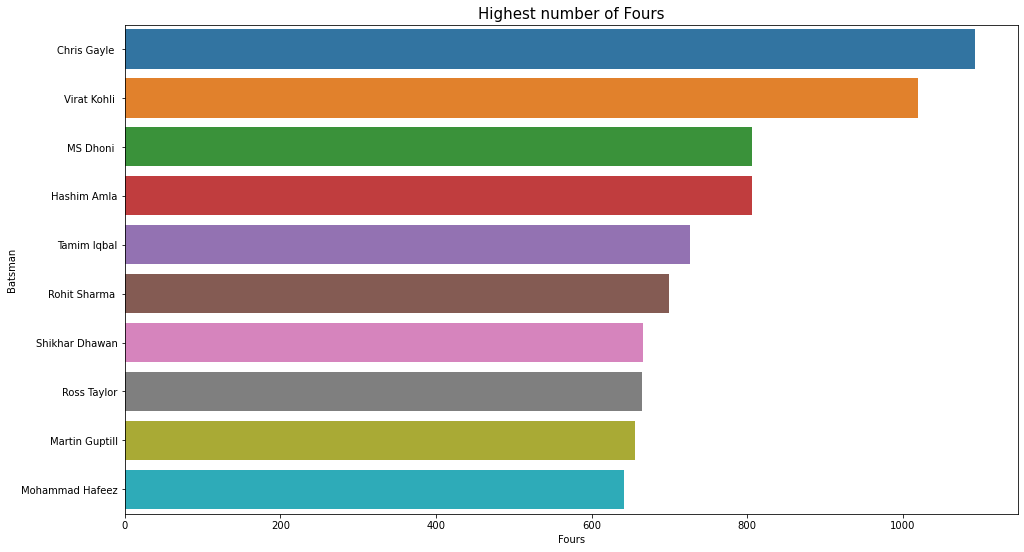

In [18]:
#Highest number of fours by batsman

f=bat_new.groupby(['Batsman'])['4s'].sum().reset_index()
f.sort_values(by='4s',ascending=False,inplace=True)
f=f.head(10)

plt.figure(figsize=(16,9))
sns.barplot(y='Batsman',x='4s',data=f,palette="tab10")

plt.yticks(fontsize=10)
plt.ylabel("Batsman",fontsize=10)
plt.xlabel("Fours",fontsize=10)
plt.title("Highest number of Fours",fontsize=15)

Text(0.5, 1.0, 'Highest no of sixers')

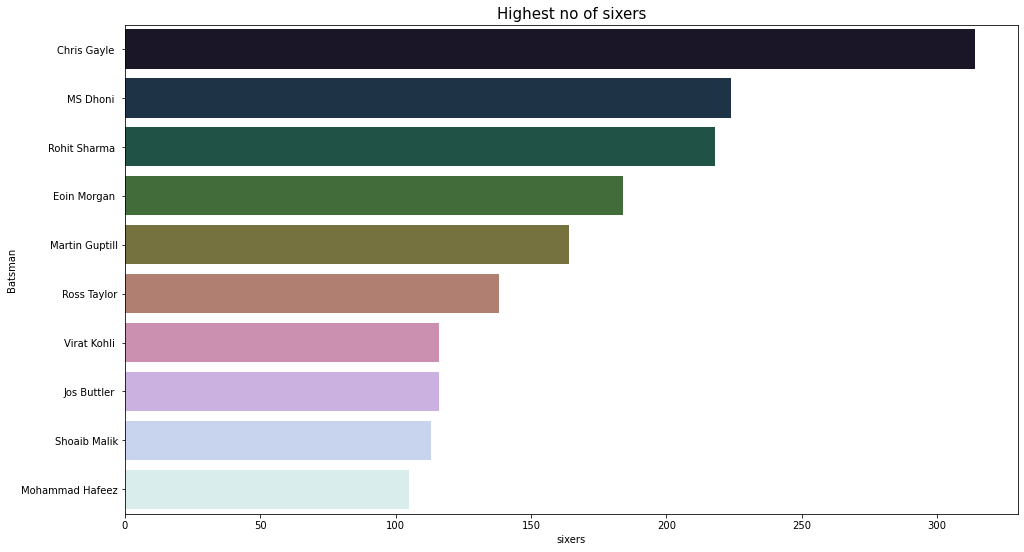

In [19]:
#Highest no of sixers by batsman

s=bat_new.groupby(['Batsman'])['6s'].sum().reset_index()
s.sort_values(by='6s',ascending=False,inplace=True)
s=s.head(10)

plt.figure(figsize=(16,9))
sns.barplot(y='Batsman',x='6s',data=s,palette="cubehelix")

plt.yticks(fontsize=10)
plt.ylabel("Batsman",fontsize=10)
plt.xlabel("sixers",fontsize=10)
plt.title('Highest no of sixers',fontsize=15)

In [20]:
#Maximum notouts by batsman

max_notout=bat_new[['notout','Batsman']].groupby('Batsman').sum()
s=max_notout.sum(axis=1).sort_values(ascending=False).head(10)
s

Batsman
MS Dhoni           82
Angelo Mathews     46
Mahmudullah        41
Shoaib Malik       40
JP Duminy          40
Virat Kohli        37
Ross Taylor        37
Lasith Malinga     35
Ravindra Jadeja    33
Kemar Roach        33
dtype: int64

<AxesSubplot:title={'center':'Maximum notouts'}, xlabel='Batsman'>

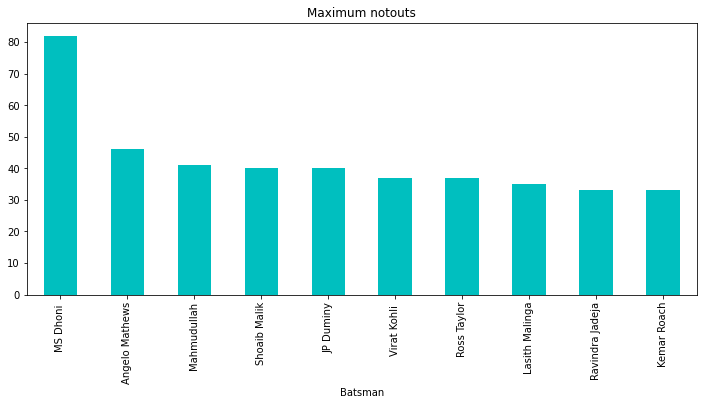

In [21]:
plt.rcParams['figure.figsize']=[12,5]
s.plot(kind='bar',color='c',title='Maximum notouts')

# Bowler Analysis

Text(0.5, 1.0, 'Highest wickets by player')

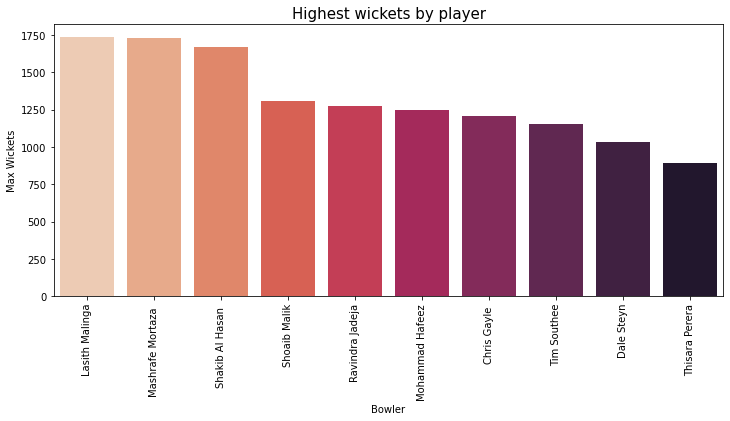

In [22]:
#Maximum wickets by bowlers

w=ball.groupby(['Bowler'])['Wkts'].sum().reset_index()
w.sort_values(by='Wkts',ascending=False,inplace=True)
w=w.head(10)

plt.figure(figsize=(12,5))
sns.barplot(x='Bowler',y='Wkts',data=w,palette='rocket_r')

plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Bowler",fontsize=10)
plt.ylabel("Max Wickets",fontsize=10)
plt.title("Highest wickets by player",fontsize=15)

Text(0.5, 1.0, 'Overs count by bowler')

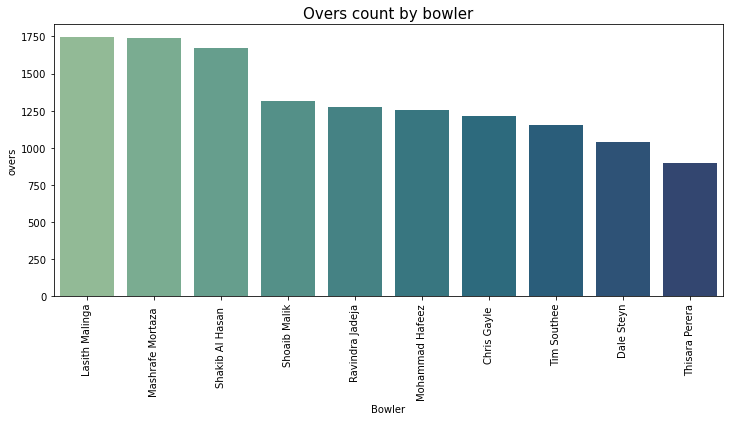

In [24]:
#Maximum overs bowled by bowlers


o=ball.groupby(['Bowler'])['Overs'].sum().reset_index()
o.sort_values(by='Overs',ascending=False,inplace=True)
o=o.head(10)
o


plt.figure(figsize=(12,5))
sns.barplot(x='Bowler',y='Overs',data=o,palette='crest')

plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Bowler",fontsize=10)
plt.ylabel("overs",fontsize=10)
plt.title("Overs count by bowler",fontsize=15)

Text(0.5, 1.0, 'Maidens by bowler ')

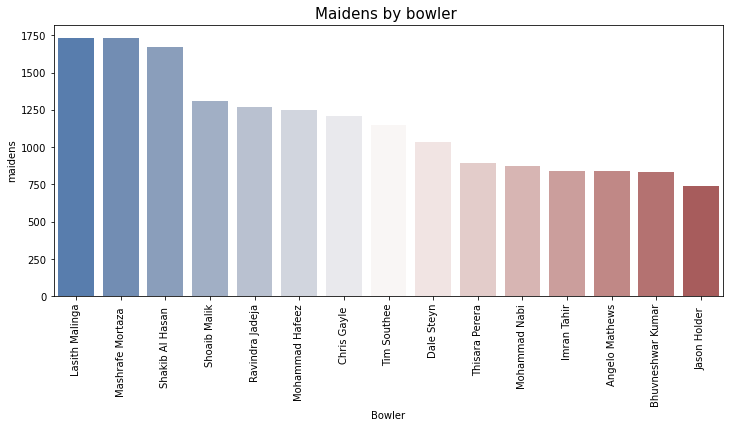

In [25]:
#Maidens by bowlers

m=ball.groupby(['Bowler'])['Mdns'].sum().reset_index()
m.sort_values(by='Mdns',ascending=False,inplace=True)
m=m.head(15)
m

plt.figure(figsize=(12,5))
sns.barplot(x='Bowler',y='Mdns',data=m,palette='vlag')

plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Bowler",fontsize=10)
plt.ylabel("maidens",fontsize=10)
plt.title("Maidens by bowler ",fontsize=15)

# Match Analysis

C:\Users\srigu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


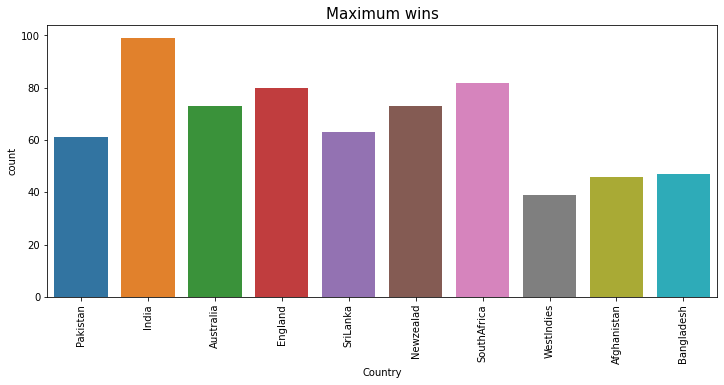

In [26]:
#Maximum wins by team


sns.countplot(odi['Country'][odi['Result']=='won'],data=odi)
plt.xticks(rotation=90)
plt.title('Maximum wins',fontsize=15)
plt.show()

C:\Users\srigu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


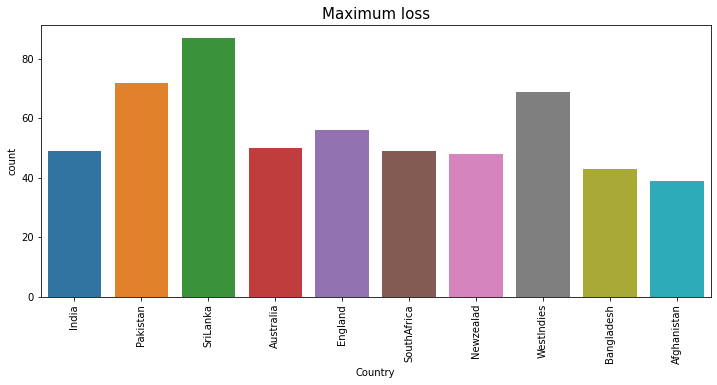

In [27]:
#Maximum loss by team

sns.countplot(odi['Country'][odi['Result']=='lost'],data=odi)
plt.xticks(rotation=90)
plt.title('Maximum loss',fontsize=15)
plt.show()

# Results




# Maximum Runs by Batsman----VIRAT KHOLI


# Highest Strike Rate--------JASON BEHRENDROFF


# Highest Not Outs-----------MS DHONI


# Highest wicket Taker-------LASITH MALINGA


# Highest Overs Bowled-------LASITH MALINGA


# Maximum Winning Team-------INDIA


# Maximum loss Team----------SRI LANKA